# Pymaceuticals Inc.
---

### Analysis

- In the Capomulin treatment group, the tumor volume continuously decreased over the course of the treatment, indicating that Capomulin has good efficacy in suppressing tumor growth.
- In the Capomulin treatment group, the number of metastatic sites also gradually decreased over the course of the treatment, further confirming the effectiveness of Capomulin in inhibiting tumor growth and metastasis.
- Compared to other treatment groups, the survival rate in the Capomulin group was significantly higher, suggesting that Capomulin, as an effective and safe anti-tumor drug, is worth further research and clinical application.
 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Combine_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')
# Display the data table for preview
Combine_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [11]:
# Checking the number of mice.
number_mice =len(Combine_df['Mouse ID'].unique())
number_mice

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice_ID = Combine_df.loc[Combine_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mice_df = Combine_df.loc[Combine_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = Combine_df[~Combine_df['Mouse ID'].isin(dup_mice_ID)]
clean_df.head()
clean_df.to_csv('clean_data.csv', index=False, sep=',', encoding='utf-8')

In [14]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [25]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).round(6)
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

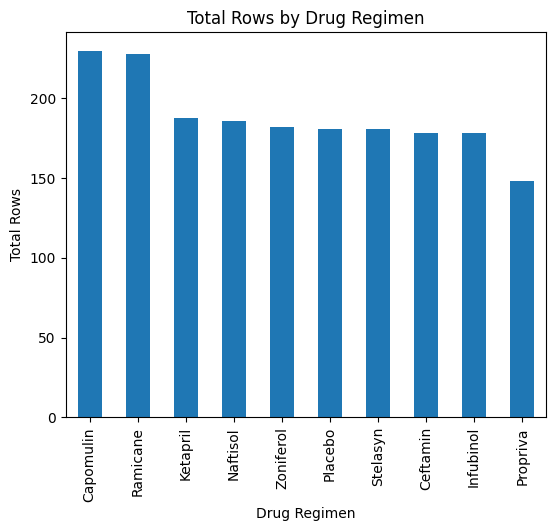

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df.groupby('Drug Regimen').size()
regimen_counts = regimen_counts.sort_values(ascending=False)
plt.figure(figsize=(6.2, 5))
regimen_counts.plot(kind='bar', title='Total Rows by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Rows')
plt.xticks(rotation=90)
plt.show()

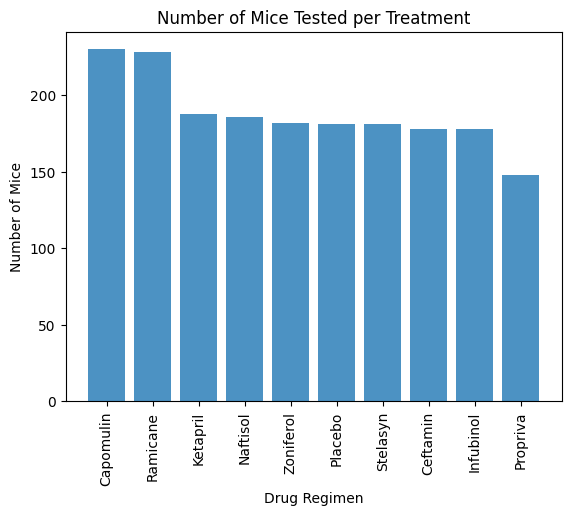

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = regimen_counts.sort_values(ascending=False)
x_axis = regimen_counts.index.values
y_axis = regimen_counts.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()


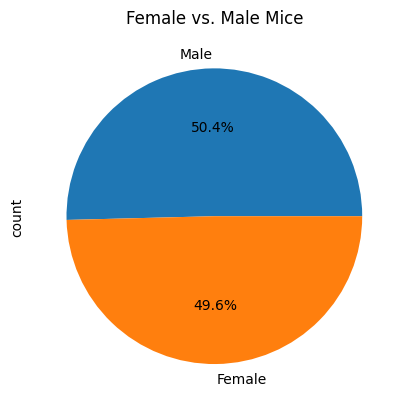

In [69]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

# Make the pie chart
mouse_metadata_path = "data/Mouse_metadata.csv"
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata = mouse_metadata[mouse_metadata["Mouse ID"] != "g989"]
gender_data = mouse_metadata["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
#combine dataframes
frames = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]
four_drugs = pd.concat(frames)

# Start by getting the last (greatest) timepoint for each mouse
group_by_ID = Combine_df.groupby(["Mouse ID"])
max_time = group_by_ID["Timepoint"].max()

# Merge this group df with the original dataframe 
merged_frames = pd.merge(four_drugs,max_time, on="Mouse ID")
merged_frames["MaxTime"] = merged_frames["Timepoint_x"] == merged_frames["Timepoint_y"]

#drop all rows that do not include the max time
merged_frames.drop(merged_frames.loc[merged_frames['MaxTime']==False].index, inplace=True)

#create new df with Mouse ID, Drug Regimen, Time and Tumor Volume
time_tumor_df = merged_frames[["Mouse ID","Drug Regimen","Timepoint_x","Tumor Volume (mm3)"]]
time_tumor_df 

,Mouse ID,Drug Regimen,Timepoint_x,Tumor Volume (mm3)
9,b128,Capomulin,45,38.982878
17,j246,Capomulin,35,38.753265
27,r554,Capomulin,45,32.377357
37,s185,Capomulin,45,23.343598
47,b742,Capomulin,45,38.939633
...,...,...,...,...
787,p438,Ceftamin,45,61.433892
793,b487,Ceftamin,25,56.057749
803,o287,Ceftamin,45,59.741901
812,q483,Ceftamin,40,64.192341


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    volume = time_tumor_df.loc[time_tumor_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volume.append(volume)
    #print(tumor_volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartile = volume.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
    #print(iqr)
   
    
    # Determine outliers using upper and lower bounds
    low_bound = lower - (1.5*iqr)
    up_bound = upper + (1.5*iqr)
    outliers = volume.loc[(volume > up_bound) | (volume < low_bound)]
    if len(outliers) > 0:
        print(f"The outliers for {drug} are {outliers}.")


The outliers for Infubinol are 459    36.321346
Name: Tumor Volume (mm3), dtype: float64.


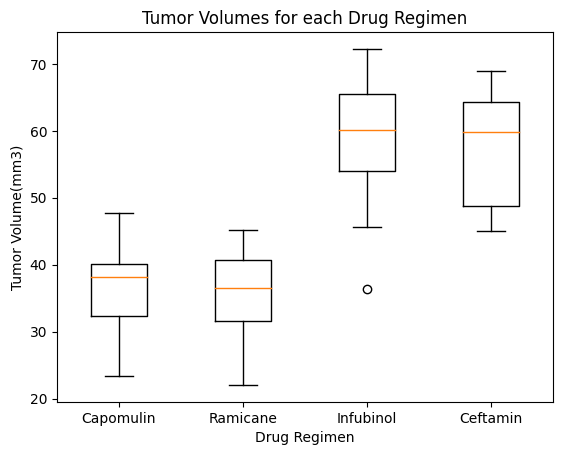

In [52]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume, labels = treatment)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume(mm3)")
plt.title("Tumor Volumes for each Drug Regimen")
plt.show()

## Line and Scatter Plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Tumor Volume (mm3)')

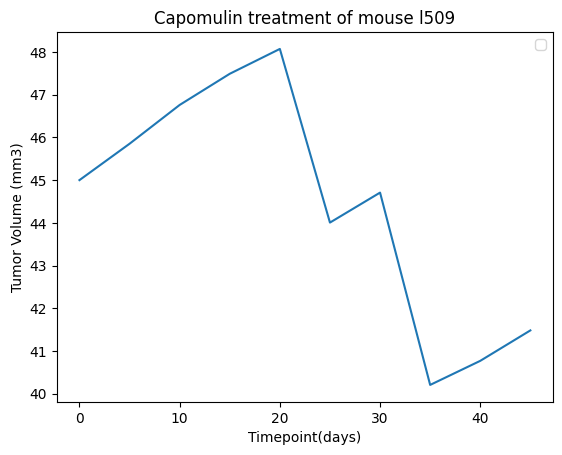

In [72]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Read the data from the "Study_results.csv" file

Capomulin_df
Mousel509 = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="l509"]
#Create Line Plot
x = Mouse185["Timepoint"]
y = Mouse185["Tumor Volume (mm3)"]
plt.plot(x, y)
plt.legend(loc="best")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")


Text(0, 0.5, 'Tumor Volume (mm3)')

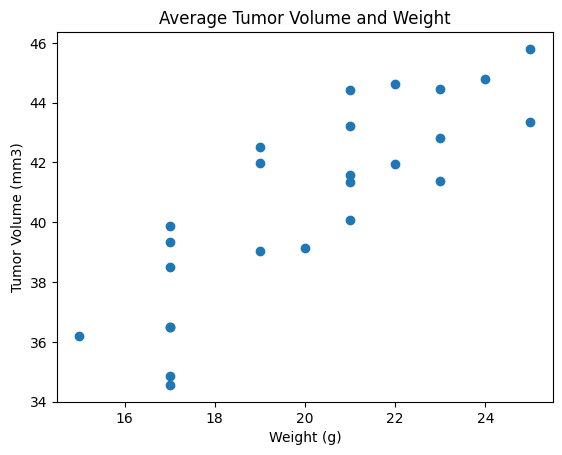

In [77]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_data = Capomulin_df.groupby("Mouse ID")
#variables to hold column data
mouseWg = mouse_data["Weight (g)"].mean()
mouseTV = mouse_data["Tumor Volume (mm3)"].mean()
#create new df
mouse_df = pd.DataFrame({"Weight (g)": mouseWg,
                       "Tumor Volume (mm3)": mouseTV})
x_values = mouse_df["Weight (g)"]
y_values = mouse_df["Tumor Volume (mm3)"]

#create scatter plot
plt.scatter(x_values, y_values)
plt.title("Average Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84


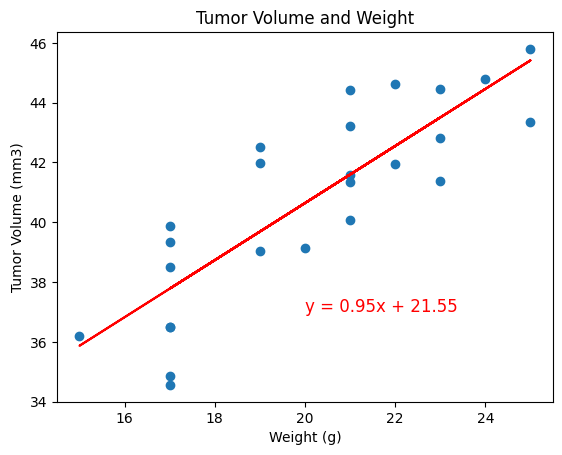

In [75]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#set x and y
x_values = mouse_df["Weight (g)"]
y_values = mouse_df["Tumor Volume (mm3)"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x_values, y_values)
plt.title("Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#plot line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=12,color="red")

#print correlation coefficient
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")